# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{base_url}appid={weather_key}&units={units}&q="

In [4]:
#create empty lists as variable to hold data per cities list index

lat = []
lon = []
temp = []
max_temp = []
humidity = []
cloudiness = []
windspeed = []
country = []
name = []

In [5]:
response = requests.get(query_url + city).json()

In [6]:
# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        name.append(response['name'])
    except KeyError:
        print("City Not Found")
        pass
        
    response = requests.get(query_url + city).json()
    print(response)

{'coord': {'lon': -135.0538, 'lat': 60.7161}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 64.98, 'feels_like': 64.04, 'temp_min': 63.1, 'temp_max': 66.02, 'pressure': 1011, 'humidity': 61}, 'visibility': 10000, 'wind': {'speed': 5.75, 'deg': 320}, 'clouds': {'all': 75}, 'dt': 1659306653, 'sys': {'type': 2, 'id': 47668, 'country': 'CA', 'sunrise': 1659270848, 'sunset': 1659332333}, 'timezone': -25200, 'id': 6180550, 'name': 'Whitehorse', 'cod': 200}
{'coord': {'lon': 166.1, 'lat': 60.4667}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 54.61, 'feels_like': 52.83, 'temp_min': 54.61, 'temp_max': 54.61, 'pressure': 1017, 'humidity': 65, 'sea_level': 1017, 'grnd_level': 992}, 'visibility': 10000, 'wind': {'speed': 4.38, 'deg': 204, 'gust': 3.4}, 'clouds': {'all': 78}, 'dt': 1659306653, 'sys': {'country': 'RU', 'sunrise': 165928

{'coord': {'lon': 12.6934, 'lat': 67.667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 53.46, 'feels_like': 52.59, 'temp_min': 53.46, 'temp_max': 53.46, 'pressure': 1012, 'humidity': 87, 'sea_level': 1012, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 10.49, 'deg': 320, 'gust': 9.95}, 'clouds': {'all': 98}, 'dt': 1659306657, 'sys': {'type': 1, 'id': 1661, 'country': 'NO', 'sunrise': 1659317396, 'sunset': 1659387664}, 'timezone': 7200, 'id': 3137469, 'name': 'Sørland', 'cod': 200}
{'coord': {'lon': -155.09, 'lat': 19.7297}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 82.53, 'feels_like': 85.82, 'temp_min': 80.62, 'temp_max': 84.27, 'pressure': 1019, 'humidity': 63}, 'visibility': 10000, 'wind': {'speed': 12.66, 'deg': 350}, 'clouds': {'all': 20}, 'dt': 1659306416, 'sys': {'type': 1, 'id': 7881, 'country': 'US

{'coord': {'lon': 168.3333, 'lat': -46.6}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 45.81, 'feels_like': 39.24, 'temp_min': 45.81, 'temp_max': 45.81, 'pressure': 1015, 'humidity': 76, 'sea_level': 1015, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 15.17, 'deg': 333, 'gust': 26.75}, 'clouds': {'all': 51}, 'dt': 1659306661, 'sys': {'type': 2, 'id': 2008959, 'country': 'NZ', 'sunrise': 1659298120, 'sunset': 1659332234}, 'timezone': 43200, 'id': 2206939, 'name': 'Bluff', 'cod': 200}
{'coord': {'lon': 130.6434, 'lat': 42.4308}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 72, 'feels_like': 73.6, 'temp_min': 72, 'temp_max': 72, 'pressure': 1006, 'humidity': 100, 'sea_level': 1006, 'grnd_level': 1004}, 'visibility': 196, 'wind': {'speed': 3.8, 'deg': 10, 'gust': 6.73}, 'rain': {'1h': 1.12}, 'clouds': {'all': 100}

{'coord': {'lon': 48.5268, 'lat': 5.3505}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 75.36, 'feels_like': 76.64, 'temp_min': 75.36, 'temp_max': 75.36, 'pressure': 1011, 'humidity': 86, 'sea_level': 1011, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 23.98, 'deg': 207, 'gust': 36.26}, 'clouds': {'all': 0}, 'dt': 1659306665, 'sys': {'country': 'SO', 'sunrise': 1659321699, 'sunset': 1659366161}, 'timezone': 10800, 'id': 57000, 'name': 'Hobyo', 'cod': 200}
{'coord': {'lon': -46.05, 'lat': 60.9167}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 57.42, 'feels_like': 56.62, 'temp_min': 57.42, 'temp_max': 57.42, 'pressure': 1007, 'humidity': 80, 'sea_level': 1007, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 4.09, 'deg': 237, 'gust': 5.01}, 'clouds': {'all': 84}, 'dt': 1659306666, 'sys': {'type': 1, 'id':

{'coord': {'lon': 50.263, 'lat': 44.5086}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 80.01, 'feels_like': 82.15, 'temp_min': 80.01, 'temp_max': 80.01, 'pressure': 1008, 'humidity': 63, 'sea_level': 1008, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 10.51, 'deg': 42, 'gust': 15.86}, 'clouds': {'all': 2}, 'dt': 1659306671, 'sys': {'country': 'KZ', 'sunrise': 1659317114, 'sunset': 1659369913}, 'timezone': 18000, 'id': 609906, 'name': 'Fort-Shevchenko', 'cod': 200}
{'coord': {'lon': 111.1814, 'lat': 34.7747}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 76.78, 'feels_like': 78.21, 'temp_min': 76.78, 'temp_max': 76.78, 'pressure': 1006, 'humidity': 86, 'sea_level': 1006, 'grnd_level': 966}, 'visibility': 10000, 'wind': {'speed': 7.14, 'deg': 106, 'gust': 13.96}, 'clouds': {'all': 0}, 'dt': 1659306671, 'sys': {'country':

{'cod': '404', 'message': 'city not found'}
City Not Found
{'coord': {'lon': -56.0861, 'lat': -9.8756}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 82.22, 'feels_like': 83.17, 'temp_min': 82.22, 'temp_max': 82.22, 'pressure': 1011, 'humidity': 51}, 'visibility': 8000, 'wind': {'speed': 2.3, 'deg': 330}, 'clouds': {'all': 1}, 'dt': 1659306675, 'sys': {'type': 1, 'id': 8308, 'country': 'BR', 'sunrise': 1659261615, 'sunset': 1659303663}, 'timezone': -14400, 'id': 6316343, 'name': 'Alta Floresta', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
City Not Found
{'cod': '404', 'message': 'city not found'}
City Not Found
{'coord': {'lon': 22.4617, 'lat': -33.963}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 42.35, 'feels_like': 39.52, 'temp_min': 42.35, 'temp_max': 42.35, 'pressure': 1030, 'humidity': 87}, 'visibility': 10000, 'wi

{'coord': {'lon': 46.3167, 'lat': -15.7167}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 71.62, 'feels_like': 71.91, 'temp_min': 71.62, 'temp_max': 71.62, 'pressure': 1018, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 2.3, 'deg': 70}, 'clouds': {'all': 20}, 'dt': 1659306680, 'sys': {'type': 1, 'id': 2143, 'country': 'MG', 'sunrise': 1659323906, 'sunset': 1659365015}, 'timezone': 10800, 'id': 1062663, 'name': 'Mahajanga', 'cod': 200}
{'coord': {'lon': 144.8916, 'lat': -37.8068}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 47.77, 'feels_like': 46.29, 'temp_min': 45.86, 'temp_max': 50.52, 'pressure': 1013, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 4, 'deg': 15, 'gust': 8.01}, 'clouds': {'all': 40}, 'dt': 1659306680, 'sys': {'type': 2, 'id': 2008797, 'country': 'AU', 'sunrise': 1659302462, 'sunset': 

{'coord': {'lon': -122.3344, 'lat': 38.4832}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 77.95, 'feels_like': 77.61, 'temp_min': 64.09, 'temp_max': 91.04, 'pressure': 1012, 'humidity': 46, 'sea_level': 1012, 'grnd_level': 975}, 'visibility': 10000, 'wind': {'speed': 8.46, 'deg': 216, 'gust': 8.95}, 'clouds': {'all': 94}, 'dt': 1659306609, 'sys': {'type': 2, 'id': 2003887, 'country': 'US', 'sunrise': 1659273025, 'sunset': 1659324052}, 'timezone': -25200, 'id': 5376101, 'name': 'Napa', 'cod': 200}
{'coord': {'lon': 175.7, 'lat': -36.8333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 55.94, 'feels_like': 54.1, 'temp_min': 55.94, 'temp_max': 55.94, 'pressure': 1026, 'humidity': 61, 'sea_level': 1026, 'grnd_level': 1025}, 'visibility': 10000, 'wind': {'speed': 7.27, 'deg': 219, 'gust': 14.5}, 'clouds': {'all': 3}, 'dt': 1659306

{'coord': {'lon': 106.2731, 'lat': 38.4681}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 77.27, 'feels_like': 77.7, 'temp_min': 77.27, 'temp_max': 77.27, 'pressure': 1002, 'humidity': 64, 'sea_level': 1002, 'grnd_level': 884}, 'visibility': 10000, 'wind': {'speed': 11.79, 'deg': 174, 'gust': 17.58}, 'clouds': {'all': 94}, 'dt': 1659306689, 'sys': {'country': 'CN', 'sunrise': 1659304580, 'sunset': 1659355563}, 'timezone': 28800, 'id': 1786657, 'name': 'Yinchuan', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
City Not Found
{'coord': {'lon': -73.8203, 'lat': -41.8697}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 44.22, 'feels_like': 44.22, 'temp_min': 44.22, 'temp_max': 44.22, 'pressure': 1019, 'humidity': 82, 'sea_level': 1019, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 0.98, 'deg': 281, 'gu

{'coord': {'lon': 33.2787, 'lat': 45.1582}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 74.43, 'feels_like': 74.8, 'temp_min': 74.43, 'temp_max': 74.43, 'pressure': 1007, 'humidity': 69, 'sea_level': 1007, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 6.11, 'deg': 13, 'gust': 6.91}, 'clouds': {'all': 9}, 'dt': 1659306694, 'sys': {'country': 'UA', 'sunrise': 1659321082, 'sunset': 1659374097}, 'timezone': 10800, 'id': 687726, 'name': 'Zaozyornoye', 'cod': 200}
{'coord': {'lon': 150.1429, 'lat': -5.5502}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 85.23, 'feels_like': 91, 'temp_min': 85.23, 'temp_max': 85.23, 'pressure': 1011, 'humidity': 64, 'sea_level': 1011, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 3.06, 'deg': 145, 'gust': 7}, 'clouds': {'all': 72}, 'dt': 1659306694, 'sys': {'country': 'PG',

{'coord': {'lon': -71.3324, 'lat': 48.5501}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.51, 'feels_like': 84.2, 'temp_min': 77.31, 'temp_max': 82.72, 'pressure': 1012, 'humidity': 55, 'sea_level': 1012, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 8.75, 'deg': 231, 'gust': 23.29}, 'clouds': {'all': 55}, 'dt': 1659306699, 'sys': {'type': 2, 'id': 2011352, 'country': 'CA', 'sunrise': 1659259100, 'sunset': 1659313496}, 'timezone': -14400, 'id': 6137381, 'name': 'Saint-Ambroise', 'cod': 200}
{'coord': {'lon': 130.4667, 'lat': 33.7667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 86.04, 'feels_like': 94.3, 'temp_min': 86, 'temp_max': 86.29, 'pressure': 1009, 'humidity': 68, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 6.26, 'deg': 130, 'gust': 9.28}, 'clouds': {'all': 10}, 'dt': 

{'coord': {'lon': -6.3865, 'lat': 58.2093}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 47.82, 'feels_like': 47.82, 'temp_min': 46.36, 'temp_max': 51.93, 'pressure': 1017, 'humidity': 89}, 'visibility': 10000, 'wind': {'speed': 2.3, 'deg': 220}, 'clouds': {'all': 43}, 'dt': 1659306704, 'sys': {'type': 2, 'id': 2043200, 'country': 'GB', 'sunrise': 1659240909, 'sunset': 1659300514}, 'timezone': 3600, 'id': 2636790, 'name': 'Stornoway', 'cod': 200}
{'coord': {'lon': 30.1551, 'lat': -28.4675}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 47.73, 'feels_like': 45.45, 'temp_min': 47.73, 'temp_max': 47.73, 'pressure': 1030, 'humidity': 71, 'sea_level': 1030, 'grnd_level': 913}, 'visibility': 10000, 'wind': {'speed': 5.17, 'deg': 128, 'gust': 7.34}, 'clouds': {'all': 100}, 'dt': 1659306704, 'sys': {'country': 'ZA', 'sunrise':

{'coord': {'lon': 32.9, 'lat': -2.5167}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 69.44, 'feels_like': 69.6, 'temp_min': 69.44, 'temp_max': 69.44, 'pressure': 1013, 'humidity': 75, 'sea_level': 1013, 'grnd_level': 888}, 'visibility': 10000, 'wind': {'speed': 3, 'deg': 204, 'gust': 3.76}, 'rain': {'1h': 1.15}, 'clouds': {'all': 86}, 'dt': 1659306709, 'sys': {'country': 'TZ', 'sunrise': 1659326068, 'sunset': 1659369293}, 'timezone': 10800, 'id': 152224, 'name': 'Mwanza', 'cod': 200}
{'coord': {'lon': 150.85, 'lat': 65.75}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 71.69, 'feels_like': 70.63, 'temp_min': 71.69, 'temp_max': 71.69, 'pressure': 1002, 'humidity': 44, 'sea_level': 1002, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 21.63, 'deg': 162, 'gust': 24.87}, 'clouds': {'all': 57}, 'dt': 1659306709, 'sys':

{'coord': {'lon': 164.0167, 'lat': -20.2333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 72.36, 'feels_like': 72.63, 'temp_min': 72.36, 'temp_max': 72.36, 'pressure': 1018, 'humidity': 71, 'sea_level': 1018, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 12.1, 'deg': 118, 'gust': 16.69}, 'clouds': {'all': 66}, 'dt': 1659306713, 'sys': {'country': 'NC', 'sunrise': 1659296053, 'sunset': 1659336373}, 'timezone': 39600, 'id': 2138555, 'name': 'Poum', 'cod': 200}
{'coord': {'lon': 39.9086, 'lat': -16.2325}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 70.93, 'feels_like': 71.53, 'temp_min': 70.93, 'temp_max': 70.93, 'pressure': 1019, 'humidity': 81, 'sea_level': 1019, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 3.98, 'deg': 183, 'gust': 5.46}, 'clouds': {'all': 5}, 'dt': 1659306714, 'sys': {'country': 

{'coord': {'lon': 122.7167, 'lat': 48}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 70.88, 'feels_like': 71.62, 'temp_min': 70.88, 'temp_max': 70.88, 'pressure': 1004, 'humidity': 84, 'sea_level': 1004, 'grnd_level': 969}, 'visibility': 10000, 'wind': {'speed': 5.44, 'deg': 346, 'gust': 6.53}, 'clouds': {'all': 92}, 'dt': 1659306718, 'sys': {'country': 'CN', 'sunrise': 1659299074, 'sunset': 1659353176}, 'timezone': 28800, 'id': 2033225, 'name': 'Zhalantun', 'cod': 200}
{'coord': {'lon': 136.6319, 'lat': 50.7214}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 73.69, 'feels_like': 74.28, 'temp_min': 73.69, 'temp_max': 73.69, 'pressure': 1008, 'humidity': 75, 'sea_level': 1008, 'grnd_level': 976}, 'visibility': 10000, 'wind': {'speed': 6.06, 'deg': 169, 'gust': 10.89}, 'clouds': {'all': 35}, 'dt': 1659306718, 'sys': {'co

{'cod': '404', 'message': 'city not found'}
City Not Found
{'coord': {'lon': -82.4543, 'lat': 27.0998}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 91.38, 'feels_like': 103.98, 'temp_min': 89.62, 'temp_max': 94.14, 'pressure': 1016, 'humidity': 65}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 310}, 'clouds': {'all': 20}, 'dt': 1659306670, 'sys': {'type': 1, 'id': 6184, 'country': 'US', 'sunrise': 1659264800, 'sunset': 1659313134}, 'timezone': -14400, 'id': 4176380, 'name': 'Venice', 'cod': 200}
{'coord': {'lon': 103.6372, 'lat': -3.7508}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 72.03, 'feels_like': 73.31, 'temp_min': 72.03, 'temp_max': 72.03, 'pressure': 1008, 'humidity': 93, 'sea_level': 1008, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 2.01, 'deg': 187, 'gust': 2.55}, 'clouds': {'all': 99}, 'd

{'coord': {'lon': 100.3354, 'lat': 5.4112}, 'weather': [{'id': 211, 'main': 'Thunderstorm', 'description': 'thunderstorm', 'icon': '11n'}, {'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 80.55, 'feels_like': 86.99, 'temp_min': 77.95, 'temp_max': 81.9, 'pressure': 1006, 'humidity': 89}, 'visibility': 8000, 'wind': {'speed': 2.3, 'deg': 0}, 'rain': {'1h': 0.11}, 'clouds': {'all': 40}, 'dt': 1659306465, 'sys': {'type': 2, 'id': 2037578, 'country': 'MY', 'sunrise': 1659309260, 'sunset': 1659353733}, 'timezone': 28800, 'id': 1735106, 'name': 'George Town', 'cod': 200}
{'coord': {'lon': 43.2976, 'lat': 50.0981}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 68.83, 'feels_like': 69.03, 'temp_min': 64.76, 'temp_max': 68.83, 'pressure': 1013, 'humidity': 77, 'sea_level': 1013, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 9.78, 'deg': 

{'coord': {'lon': 146.4167, 'lat': 68.5333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 75.25, 'feels_like': 74.17, 'temp_min': 75.25, 'temp_max': 75.25, 'pressure': 998, 'humidity': 36, 'sea_level': 998, 'grnd_level': 992}, 'visibility': 10000, 'wind': {'speed': 10.87, 'deg': 181, 'gust': 14.41}, 'clouds': {'all': 87}, 'dt': 1659306731, 'sys': {'country': 'RU', 'sunrise': 1659284204, 'sunset': 1659356670}, 'timezone': 39600, 'id': 2126785, 'name': 'Belaya Gora', 'cod': 200}
{'coord': {'lon': 58.5089, 'lat': 53.3372}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 56.35, 'feels_like': 55.83, 'temp_min': 56.35, 'temp_max': 56.35, 'pressure': 1012, 'humidity': 88}, 'visibility': 8000, 'wind': {'speed': 6.71, 'deg': 310}, 'clouds': {'all': 40}, 'dt': 1659306732, 'sys': {'type': 1, 'id': 8976, 'country': 'RU', 'sunrise': 

{'coord': {'lon': -77.05, 'lat': -12.1167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 63.01, 'feels_like': 62.78, 'temp_min': 60.39, 'temp_max': 63.01, 'pressure': 1015, 'humidity': 80}, 'visibility': 10000, 'wind': {'speed': 10.36, 'deg': 170}, 'clouds': {'all': 100}, 'dt': 1659306736, 'sys': {'type': 2, 'id': 2037860, 'country': 'PE', 'sunrise': 1659266828, 'sunset': 1659308512}, 'timezone': -18000, 'id': 3929631, 'name': 'San Isidro', 'cod': 200}
{'coord': {'lon': -40.4767, 'lat': -4.1944}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 75.6, 'feels_like': 76.51, 'temp_min': 75.6, 'temp_max': 75.6, 'pressure': 1013, 'humidity': 78, 'sea_level': 1013, 'grnd_level': 992}, 'visibility': 10000, 'wind': {'speed': 3.33, 'deg': 341, 'gust': 5.3}, 'clouds': {'all': 83}, 'dt': 1659306737, 'sys': {'country': 'BR', 'sunrise': 1

{'coord': {'lon': 114.3, 'lat': 25.1167}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 79.92, 'feels_like': 79.92, 'temp_min': 79.92, 'temp_max': 79.92, 'pressure': 1007, 'humidity': 74, 'sea_level': 1007, 'grnd_level': 993}, 'visibility': 10000, 'wind': {'speed': 2.01, 'deg': 203, 'gust': 2.84}, 'clouds': {'all': 13}, 'dt': 1659306741, 'sys': {'country': 'CN', 'sunrise': 1659304194, 'sunset': 1659352096}, 'timezone': 28800, 'id': 1788402, 'name': 'Xiongzhou', 'cod': 200}
{'coord': {'lon': 18.7153, 'lat': 63.2909}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 56.35, 'feels_like': 56.39, 'temp_min': 56.35, 'temp_max': 56.35, 'pressure': 1011, 'humidity': 100}, 'visibility': 150, 'wind': {'speed': 4.61, 'deg': 40}, 'clouds': {'all': 100}, 'dt': 1659306742, 'sys': {'type': 1, 'id': 1768, 'country': 'SE', 'sunrise': 1659319177,

{'coord': {'lon': -25.6667, 'lat': 37.7333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 72.32, 'feels_like': 72.91, 'temp_min': 72.32, 'temp_max': 72.32, 'pressure': 1025, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 90}, 'clouds': {'all': 75}, 'dt': 1659306529, 'sys': {'type': 1, 'id': 6899, 'country': 'PT', 'sunrise': 1659249913, 'sunset': 1659300764}, 'timezone': 0, 'id': 3372783, 'name': 'Ponta Delgada', 'cod': 200}
{'coord': {'lon': 124.9112, 'lat': 1.3038}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 68.09, 'feels_like': 68.68, 'temp_min': 68.09, 'temp_max': 68.09, 'pressure': 1010, 'humidity': 87, 'sea_level': 1010, 'grnd_level': 933}, 'visibility': 10000, 'wind': {'speed': 1.54, 'deg': 162, 'gust': 3.31}, 'clouds': {'all': 98}, 'dt': 1659306746, 'sys': {'type': 1, 'id': 9356, 'country':

{'coord': {'lon': 103.6167, 'lat': -1.6}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 73.54, 'feels_like': 75.2, 'temp_min': 73.54, 'temp_max': 73.54, 'pressure': 1007, 'humidity': 98, 'sea_level': 1007, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 2.84, 'deg': 183, 'gust': 12.28}, 'clouds': {'all': 100}, 'dt': 1659306750, 'sys': {'country': 'ID', 'sunrise': 1659309025, 'sunset': 1659352393}, 'timezone': 25200, 'id': 1642858, 'name': 'Jambi City', 'cod': 200}
{'coord': {'lon': -109.9124, 'lat': 22.8909}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 88.63, 'feels_like': 101.23, 'temp_min': 83.5, 'temp_max': 92.05, 'pressure': 917, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 11.5, 'deg': 190}, 'clouds': {'all': 40}, 'dt': 1659306646, 'sys': {'type': 2, 'id': 2004005, 'country': 'MX', 'sunrise

{'coord': {'lon': -15.8333, 'lat': 11.2833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 79.52, 'feels_like': 79.52, 'temp_min': 79.52, 'temp_max': 79.52, 'pressure': 1015, 'humidity': 78, 'sea_level': 1015, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 16.02, 'deg': 236, 'gust': 16.2}, 'clouds': {'all': 97}, 'dt': 1659306754, 'sys': {'country': 'GW', 'sunrise': 1659250258, 'sunset': 1659295699}, 'timezone': 0, 'id': 2374583, 'name': 'Bubaque', 'cod': 200}
{'coord': {'lon': -89.6667, 'lat': 21.2833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 91.11, 'feels_like': 103.71, 'temp_min': 91.11, 'temp_max': 93.31, 'pressure': 1015, 'humidity': 75, 'sea_level': 1015, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 17.54, 'deg': 54, 'gust': 25.34}, 'clouds': {'all': 85}, 'dt': 1659306755, 'sys': {'

{'coord': {'lon': 71.7446, 'lat': 29.1212}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 87.73, 'feels_like': 98.94, 'temp_min': 87.73, 'temp_max': 87.73, 'pressure': 997, 'humidity': 69, 'sea_level': 997, 'grnd_level': 983}, 'visibility': 10000, 'wind': {'speed': 13.27, 'deg': 198, 'gust': 20.71}, 'clouds': {'all': 65}, 'dt': 1659306759, 'sys': {'country': 'PK', 'sunrise': 1659313999, 'sunset': 1659362717}, 'timezone': 18000, 'id': 1162316, 'name': 'Yazman', 'cod': 200}
{'coord': {'lon': 121.1855, 'lat': 32.3174}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 81.91, 'feels_like': 90.39, 'temp_min': 81.91, 'temp_max': 81.91, 'pressure': 1004, 'humidity': 87, 'sea_level': 1004, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 11.95, 'deg': 309, 'gust': 21.83}, 'clouds': {'all': 0}, 'dt': 1659306759, 'sys': {'type': 2, 

{'coord': {'lon': -50.1878, 'lat': -23.8486}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 56.71, 'feels_like': 54.95, 'temp_min': 56.71, 'temp_max': 56.71, 'pressure': 1018, 'humidity': 61, 'sea_level': 1018, 'grnd_level': 921}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 145, 'gust': 2.15}, 'clouds': {'all': 0}, 'dt': 1659306764, 'sys': {'country': 'BR', 'sunrise': 1659261403, 'sunset': 1659301044}, 'timezone': -10800, 'id': 3461628, 'name': 'Ibaiti', 'cod': 200}
{'coord': {'lon': -8.3327, 'lat': 40.1629}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 69.69, 'feels_like': 69.22, 'temp_min': 69.69, 'temp_max': 69.69, 'pressure': 1015, 'humidity': 61, 'sea_level': 1015, 'grnd_level': 995}, 'visibility': 10000, 'wind': {'speed': 2.3, 'deg': 43, 'gust': 3.18}, 'clouds': {'all': 0}, 'dt': 1659306764, 'sys': {'country': 'PT', 'su

{'coord': {'lon': -105.25, 'lat': 19.9333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 90.66, 'feels_like': 96.85, 'temp_min': 90.66, 'temp_max': 90.66, 'pressure': 1011, 'humidity': 52, 'sea_level': 1011, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 9.91, 'deg': 266, 'gust': 8.9}, 'clouds': {'all': 55}, 'dt': 1659306768, 'sys': {'country': 'MX', 'sunrise': 1659270969, 'sunset': 1659317907}, 'timezone': -18000, 'id': 3981391, 'name': 'Tomatlán', 'cod': 200}
{'coord': {'lon': 125.5072, 'lat': 12.1791}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 81.72, 'feels_like': 88.57, 'temp_min': 81.72, 'temp_max': 81.72, 'pressure': 1009, 'humidity': 82, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 7.63, 'deg': 166, 'gust': 11.1}, 'clouds': {'all': 100}, 'dt': 1659306665, 'sys': {'

{'coord': {'lon': -77.9169, 'lat': 21.3808}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 88.14, 'feels_like': 98.42, 'temp_min': 88.14, 'temp_max': 88.14, 'pressure': 1017, 'humidity': 66}, 'visibility': 9000, 'wind': {'speed': 20.71, 'deg': 40}, 'clouds': {'all': 40}, 'dt': 1659306772, 'sys': {'type': 1, 'id': 7230, 'country': 'CU', 'sunrise': 1659264273, 'sunset': 1659311483}, 'timezone': -14400, 'id': 3566067, 'name': 'Camagüey', 'cod': 200}
{'coord': {'lon': -44.5561, 'lat': -7.2294}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 81.59, 'feels_like': 82.06, 'temp_min': 81.59, 'temp_max': 81.59, 'pressure': 1012, 'humidity': 48, 'sea_level': 1012, 'grnd_level': 993}, 'visibility': 10000, 'wind': {'speed': 3.27, 'deg': 103, 'gust': 7.09}, 'clouds': {'all': 64}, 'dt': 1659306772, 'sys': {'country': 'BR', 'sunrise': 165

{'coord': {'lon': 149.2, 'lat': -21.15}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 65.68, 'feels_like': 65.66, 'temp_min': 65.68, 'temp_max': 65.68, 'pressure': 1019, 'humidity': 79, 'sea_level': 1019, 'grnd_level': 1019}, 'visibility': 10000, 'wind': {'speed': 7.31, 'deg': 137, 'gust': 10.8}, 'clouds': {'all': 85}, 'dt': 1659306560, 'sys': {'type': 2, 'id': 254970, 'country': 'AU', 'sunrise': 1659299690, 'sunset': 1659339849}, 'timezone': 36000, 'id': 2159220, 'name': 'Mackay', 'cod': 200}
{'coord': {'lon': -16.3333, 'lat': 33.0833}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 67.42, 'feels_like': 67.53, 'temp_min': 67.42, 'temp_max': 67.42, 'pressure': 1019, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 9.22, 'deg': 20}, 'clouds': {'all': 40}, 'dt': 1659306778, 'sys': {'type': 1, 'id': 6902, 'country':

{'coord': {'lon': 149.1281, 'lat': -35.2835}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 45.88, 'feels_like': 39.69, 'temp_min': 44.1, 'temp_max': 47.44, 'pressure': 1016, 'humidity': 90}, 'visibility': 10000, 'wind': {'speed': 13.8, 'deg': 340}, 'clouds': {'all': 100}, 'dt': 1659306529, 'sys': {'type': 2, 'id': 2004200, 'country': 'AU', 'sunrise': 1659301139, 'sunset': 1659338434}, 'timezone': 36000, 'id': 2172517, 'name': 'Canberra', 'cod': 200}
{'coord': {'lon': 2.6634, 'lat': 10.2283}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 70.41, 'feels_like': 71.56, 'temp_min': 70.41, 'temp_max': 70.41, 'pressure': 1013, 'humidity': 94, 'sea_level': 1013, 'grnd_level': 958}, 'visibility': 10000, 'wind': {'speed': 4.45, 'deg': 179, 'gust': 9.82}, 'clouds': {'all': 97}, 'dt': 1659306782, 'sys': {'country': 'BJ', 'sunrise': 

{'coord': {'lon': 51.166, 'lat': 52.802}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 63.14, 'feels_like': 62.96, 'temp_min': 63.14, 'temp_max': 63.14, 'pressure': 1013, 'humidity': 81, 'sea_level': 1013, 'grnd_level': 1002}, 'visibility': 10000, 'wind': {'speed': 5.08, 'deg': 346, 'gust': 5.39}, 'clouds': {'all': 81}, 'dt': 1659306787, 'sys': {'country': 'RU', 'sunrise': 1659315202, 'sunset': 1659371392}, 'timezone': 14400, 'id': 522945, 'name': 'Neftegorsk', 'cod': 200}
{'coord': {'lon': -39.2481, 'lat': -17.7125}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 69.98, 'feels_like': 70.95, 'temp_min': 69.98, 'temp_max': 69.98, 'pressure': 1020, 'humidity': 91, 'sea_level': 1020, 'grnd_level': 1020}, 'visibility': 10000, 'wind': {'speed': 7.96, 'deg': 140, 'gust': 15.73}, 'clouds': {'all': 80}, 'dt': 1659306787, 'sys': {'co

{'coord': {'lon': 15.8833, 'lat': -17.4}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 54.59, 'feels_like': 51.3, 'temp_min': 54.59, 'temp_max': 54.59, 'pressure': 1017, 'humidity': 33, 'sea_level': 1017, 'grnd_level': 892}, 'visibility': 10000, 'wind': {'speed': 7.11, 'deg': 226, 'gust': 10.45}, 'clouds': {'all': 3}, 'dt': 1659306792, 'sys': {'country': 'NA', 'sunrise': 1659331350, 'sunset': 1659372179}, 'timezone': 7200, 'id': 3353996, 'name': 'Oshikango', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
City Not Found
{'coord': {'lon': -59.4307, 'lat': -34.6515}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 56.82, 'feels_like': 55.45, 'temp_min': 56.79, 'temp_max': 57.63, 'pressure': 1018, 'humidity': 69, 'sea_level': 1018, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 6.22, 'deg': 64, 'gust': 6.24}, 'clouds'

{'coord': {'lon': 54.9763, 'lat': 36.4182}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 70.63, 'feels_like': 69.75, 'temp_min': 70.63, 'temp_max': 70.63, 'pressure': 1009, 'humidity': 50, 'sea_level': 1009, 'grnd_level': 865}, 'visibility': 10000, 'wind': {'speed': 5.59, 'deg': 31, 'gust': 7.05}, 'clouds': {'all': 21}, 'dt': 1659306797, 'sys': {'country': 'IR', 'sunrise': 1659317171, 'sunset': 1659367594}, 'timezone': 16200, 'id': 135423, 'name': 'Shahrud', 'cod': 200}
{'coord': {'lon': 83.4484, 'lat': 27.7006}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77.29, 'feels_like': 79.09, 'temp_min': 77.29, 'temp_max': 77.29, 'pressure': 1001, 'humidity': 93, 'sea_level': 1001, 'grnd_level': 970}, 'visibility': 10000, 'wind': {'speed': 1.77, 'deg': 55, 'gust': 2.37}, 'clouds': {'all': 73}, 'dt': 1659306797, 'sys': {'country': 'NP

{'coord': {'lon': -97.0667, 'lat': 15.85}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 88.63, 'feels_like': 97.52, 'temp_min': 88.63, 'temp_max': 88.63, 'pressure': 1012, 'humidity': 62}, 'visibility': 10000, 'wind': {'speed': 9.22, 'deg': 210}, 'clouds': {'all': 40}, 'dt': 1659306802, 'sys': {'type': 1, 'id': 7157, 'country': 'MX', 'sunrise': 1659269368, 'sunset': 1659315580}, 'timezone': -18000, 'id': 3520994, 'name': 'Puerto Escondido', 'cod': 200}
{'coord': {'lon': 60.4153, 'lat': 60.8697}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 54.86, 'feels_like': 53.71, 'temp_min': 54.86, 'temp_max': 54.86, 'pressure': 1018, 'humidity': 78, 'sea_level': 1018, 'grnd_level': 991}, 'visibility': 10000, 'wind': {'speed': 4.41, 'deg': 18, 'gust': 6.35}, 'clouds': {'all': 100}, 'dt': 1659306802, 'sys': {'country': 'RU', 'sunri

{'coord': {'lon': 23.8258, 'lat': 53.6884}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 61.2, 'feels_like': 61.66, 'temp_min': 61.2, 'temp_max': 61.2, 'pressure': 1009, 'humidity': 99, 'sea_level': 1009, 'grnd_level': 993}, 'visibility': 2249, 'wind': {'speed': 7.56, 'deg': 136, 'gust': 16.75}, 'clouds': {'all': 100}, 'dt': 1659306806, 'sys': {'country': 'BY', 'sunrise': 1659321544, 'sunset': 1659378172}, 'timezone': 10800, 'id': 627904, 'name': 'Hrodna', 'cod': 200}
{'coord': {'lon': -2.15, 'lat': 39.2167}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 77.47, 'feels_like': 77.92, 'temp_min': 76.41, 'temp_max': 79.9, 'pressure': 1017, 'humidity': 64, 'sea_level': 1017, 'grnd_level': 937}, 'visibility': 10000, 'wind': {'speed': 13.47, 'deg': 122, 'gust': 22.86}, 'clouds': {'all': 27}, 'dt': 1659306806, 'sys': {'type': 

{'coord': {'lon': -103.25, 'lat': 20.8667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 76.86, 'feels_like': 76.59, 'temp_min': 76.86, 'temp_max': 76.86, 'pressure': 1012, 'humidity': 50, 'sea_level': 1012, 'grnd_level': 836}, 'visibility': 10000, 'wind': {'speed': 2.35, 'deg': 306, 'gust': 3.76}, 'clouds': {'all': 100}, 'dt': 1659306811, 'sys': {'type': 1, 'id': 7128, 'country': 'MX', 'sunrise': 1659270403, 'sunset': 1659317513}, 'timezone': -18000, 'id': 4004274, 'name': 'Ixtlahuacán del Río', 'cod': 200}
{'coord': {'lon': -92.4594, 'lat': 46.7216}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 78.62, 'feels_like': 79.23, 'temp_min': 73.87, 'temp_max': 81.28, 'pressure': 1003, 'humidity': 65}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 170}, 'clouds': {'all': 83}, 'dt': 1659306811, 'sys': {'type': 1, 'id': 368

{'coord': {'lon': 51.8905, 'lat': 62.8629}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 59.27, 'feels_like': 59.56, 'temp_min': 59.27, 'temp_max': 59.27, 'pressure': 1014, 'humidity': 99, 'sea_level': 1014, 'grnd_level': 996}, 'visibility': 10000, 'wind': {'speed': 4.81, 'deg': 104, 'gust': 15.46}, 'clouds': {'all': 100}, 'dt': 1659306816, 'sys': {'country': 'RU', 'sunrise': 1659311430, 'sunset': 1659374816}, 'timezone': 10800, 'id': 492860, 'name': 'Sindor', 'cod': 200}
{'coord': {'lon': 17.1667, 'lat': 11.7833}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 77.79, 'feels_like': 78.89, 'temp_min': 77.79, 'temp_max': 77.79, 'pressure': 1011, 'humidity': 77, 'sea_level': 1011, 'grnd_level': 974}, 'visibility': 10000, 'wind': {'speed': 7.49, 'deg': 187, 'gust': 11.68}, 'rain': {'1h': 0.43}, 'clouds': {'all': 99}, 'dt': 16593068

{'coord': {'lon': 43.876, 'lat': 54.6207}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 56.39, 'feels_like': 54.93, 'temp_min': 56.39, 'temp_max': 56.39, 'pressure': 1018, 'humidity': 68, 'sea_level': 1018, 'grnd_level': 1002}, 'visibility': 10000, 'wind': {'speed': 5.1, 'deg': 25, 'gust': 5.19}, 'clouds': {'all': 49}, 'dt': 1659306822, 'sys': {'country': 'RU', 'sunrise': 1659316475, 'sunset': 1659373617}, 'timezone': 10800, 'id': 525369, 'name': 'Yelniki', 'cod': 200}
{'coord': {'lon': 8.6, 'lat': 8.9333}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 70.38, 'feels_like': 71.62, 'temp_min': 70.38, 'temp_max': 70.38, 'pressure': 1014, 'humidity': 96, 'sea_level': 1014, 'grnd_level': 972}, 'visibility': 10000, 'wind': {'speed': 1.45, 'deg': 276, 'gust': 2.13}, 'rain': {'1h': 0.99}, 'clouds': {'all': 65}, 'dt': 1659306822, 'sys

{'coord': {'lon': 112.95, 'lat': -2.5333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 73.13, 'feels_like': 74.66, 'temp_min': 73.13, 'temp_max': 73.13, 'pressure': 1008, 'humidity': 96, 'sea_level': 1008, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 2.13, 'deg': 71, 'gust': 6.29}, 'clouds': {'all': 100}, 'dt': 1659306826, 'sys': {'country': 'ID', 'sunrise': 1659306858, 'sunset': 1659350080}, 'timezone': 25200, 'id': 1628884, 'name': 'Sampit', 'cod': 200}
{'coord': {'lon': 130.4114, 'lat': 67.8006}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 71.64, 'feels_like': 70.99, 'temp_min': 71.64, 'temp_max': 71.64, 'pressure': 997, 'humidity': 53, 'sea_level': 997, 'grnd_level': 940}, 'visibility': 10000, 'wind': {'speed': 8.08, 'deg': 226, 'gust': 14.47}, 'clouds': {'all': 100}, 'dt': 1659306645, 'sys': {'cou

In [7]:
city_data_df = pd.DataFrame({'City': name, 
                            'Latitude': lat,
                            'Longitude': lon,
                            'Temperature': temp,
                            'Max Temp': max_temp,
                            'Humidity': humidity, 
                            'Cloudiness': cloudiness, 
                            'Wind Speed': windspeed, 
                            'Country': country})

In [8]:
city_data_df

,City,Latitude,Longitude,Temperature,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Pevek,69.7008,170.3133,47.71,47.71,66,0,12.03,RU
1,Whitehorse,60.7161,-135.0538,64.98,66.02,61,75,5.75,CA
2,Tilichiki,60.4667,166.1000,54.61,54.61,65,78,4.38,RU
3,Bredasdorp,-34.5322,20.0403,42.51,42.51,83,3,3.65,ZA
4,Bonfim,3.0833,-59.9500,78.28,78.28,80,46,4.88,BR
...,...,...,...,...,...,...,...,...,...
560,Brunswick,41.2381,-81.8418,79.88,83.14,54,40,5.75,US
561,Muros,42.7762,-9.0603,70.68,70.68,79,1,11.30,ES
562,Sampit,-2.5333,112.9500,73.13,73.13,96,100,2.13,ID
563,Batagay-Alyta,67.8006,130.4114,71.64,71.64,53,100,8.08,RU


In [9]:
city_data_df.drop_duplicates()

,City,Latitude,Longitude,Temperature,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Pevek,69.7008,170.3133,47.71,47.71,66,0,12.03,RU
1,Whitehorse,60.7161,-135.0538,64.98,66.02,61,75,5.75,CA
2,Tilichiki,60.4667,166.1000,54.61,54.61,65,78,4.38,RU
3,Bredasdorp,-34.5322,20.0403,42.51,42.51,83,3,3.65,ZA
4,Bonfim,3.0833,-59.9500,78.28,78.28,80,46,4.88,BR
...,...,...,...,...,...,...,...,...,...
560,Brunswick,41.2381,-81.8418,79.88,83.14,54,40,5.75,US
561,Muros,42.7762,-9.0603,70.68,70.68,79,1,11.30,ES
562,Sampit,-2.5333,112.9500,73.13,73.13,96,100,2.13,ID
563,Batagay-Alyta,67.8006,130.4114,71.64,71.64,53,100,8.08,RU


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# Save data to csv

city_data_df.to_csv("city_data.csv", encoding="utf-8", index=False)

# Start Here After Initial API Call Complete

In [11]:
csv_path = "city_data.csv"
city_data_df = pd.read_csv(csv_path, encoding="UTF-8")
city_data_df.head()

,City,Latitude,Longitude,Temperature,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Pevek,69.7008,170.3133,47.71,47.71,66,0,12.03,RU
1,Whitehorse,60.7161,-135.0538,64.98,66.02,61,75,5.75,CA
2,Tilichiki,60.4667,166.1000,54.61,54.61,65,78,4.38,RU
3,Bredasdorp,-34.5322,20.0403,42.51,42.51,83,3,3.65,ZA
4,Bonfim,3.0833,-59.9500,78.28,78.28,80,46,4.88,BR


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
city_data_df.sort_values(by='Humidity', ascending=False)

,City,Latitude,Longitude,Temperature,Max Temp,Humidity,Cloudiness,Wind Speed,Country
289,Örnsköldsvik,63.2909,18.7153,56.35,56.35,100,100,4.61,SE
32,Khasan,42.4308,130.6434,72.00,72.00,100,100,3.80,RU
508,Kayerkan,69.3497,87.7602,42.53,42.53,100,21,20.56,RU
532,Sindor,62.8629,51.8905,59.27,59.27,99,100,4.81,RU
251,Snåase,64.2457,12.3778,55.81,55.81,99,100,3.94,NO
...,...,...,...,...,...,...,...,...,...
462,Hīt,33.6416,42.8251,95.11,95.11,14,3,9.55,IQ
460,Anaconda,46.1285,-112.9423,92.39,92.39,12,9,14.12,US
528,Fernie,49.5000,-115.0687,93.88,93.88,11,0,9.75,CA
381,Winnemucca,40.9730,-117.7357,102.25,102.25,6,0,8.05,US


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## </span>Latitude vs. Temperature Plot

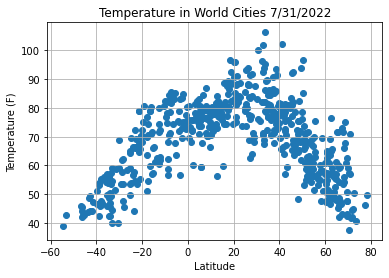

In [13]:
# Build a scatter plot for Temperature
plt.scatter(city_data_df["Latitude"], city_data_df["Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities 7/31/2022")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

## </span>Latitude vs. Humidity Plot

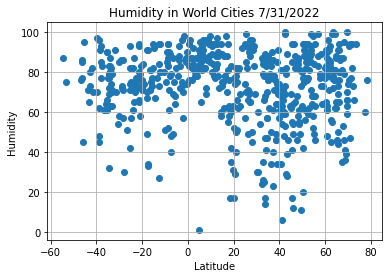

In [14]:
# Build a scatter plot for Humidity
plt.scatter(city_data_df["Latitude"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities 7/31/2022")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

## </span>Latitude vs. Cloudiness Plot

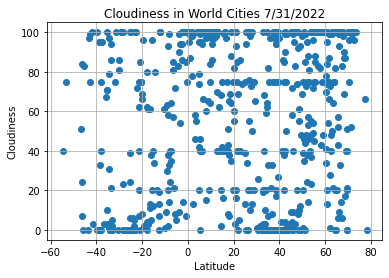

In [15]:
# Build a scatter plot for Cloudiness
plt.scatter(city_data_df["Latitude"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities 7/31/2022")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

## </span>Latitude vs. Wind Speed Plot

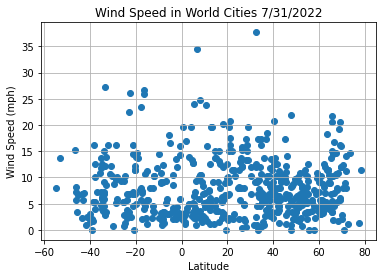

In [16]:
# Build a scatter plot for Wind Speed
plt.scatter(city_data_df["Latitude"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities 7/31/2022")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()

## Linear Regression

In [17]:
#split city dataframe into two hemispheres 
north_df = city_data_df.loc[city_data_df['Latitude'] > 0]
south_df = city_data_df.loc[city_data_df['Latitude'] < 0]

In [18]:
north_df.head()

,City,Latitude,Longitude,Temperature,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Pevek,69.7008,170.3133,47.71,47.71,66,0,12.03,RU
1,Whitehorse,60.7161,-135.0538,64.98,66.02,61,75,5.75,CA
2,Tilichiki,60.4667,166.1000,54.61,54.61,65,78,4.38,RU
4,Bonfim,3.0833,-59.9500,78.28,78.28,80,46,4.88,BR
5,Ostrovnoy,68.0531,39.5131,56.10,56.10,79,87,5.35,RU


In [19]:
south_df.head()

,City,Latitude,Longitude,Temperature,Max Temp,Humidity,Cloudiness,Wind Speed,Country
3,Bredasdorp,-34.5322,20.0403,42.51,42.51,83,3,3.65,ZA
6,Lebu,-37.6167,-73.6500,47.01,47.01,83,95,5.30,CL
11,Atuona,-9.8000,-139.0333,76.87,76.87,75,9,14.41,PF
13,Cape Town,-33.9258,18.4232,50.32,52.92,80,0,6.91,ZA
14,Punta Arenas,-53.1500,-70.9167,42.91,42.91,75,75,13.80,CL


## Max Temp

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

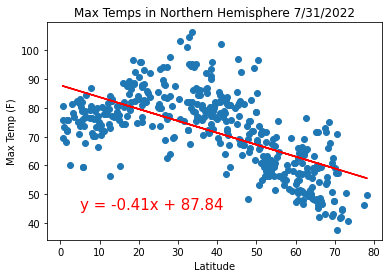

In [20]:
x_values = north_df['Latitude']
y_values = north_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,45),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Max Temps in Northern Hemisphere 7/31/2022")

# Save the figure
plt.savefig("MaxTempsNorth.png")

plt.show()

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

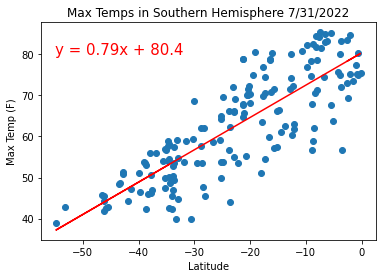

In [21]:
x_values = south_df['Latitude']
y_values = south_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Max Temps in Southern Hemisphere 7/31/2022")

# Save the figure
plt.savefig("MaxTempsSouth.png")

plt.show()

#### Max Temp Description - Overall the trend is a general increase in temp toward the equator, however as 
#### evidenced in the Norther Hemisphere by an arching of the plots the peak maximum of temperatures appear
#### roughly ten degrees higher at approx the Tropic of Cancer. 

## Humidity

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

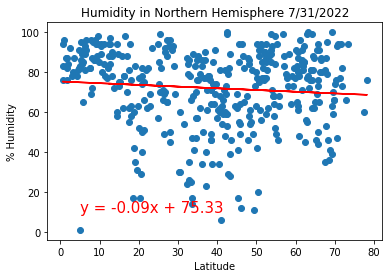

In [22]:
x_values = north_df['Latitude']
y_values = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.title("Humidity in Northern Hemisphere 7/31/2022")

# Save the figure
plt.savefig("HumidityNorth.png")

plt.show()

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

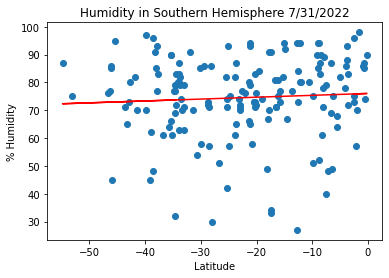

In [23]:
x_values = south_df['Latitude']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.title("Humidity in Southern Hemisphere 7/31/2022")

# Save the figure
plt.savefig("HumiditySouth.png")

plt.show()

#### Humidity Description - Overall the trend is that there is less humidity south of the equator, and  
#### more humidity north of the equator. However as evidenced in both of these plots any increase 
#### related to the equator, or approaching the equator is very slight.

## Cloudiness

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

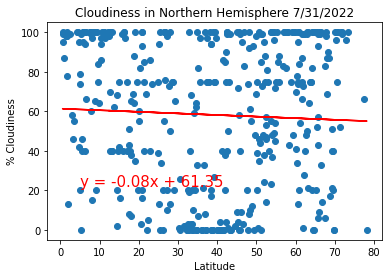

In [24]:
x_values = north_df['Latitude']
y_values = north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,22),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
plt.title("Cloudiness in Northern Hemisphere 7/31/2022")

# Save the figure
plt.savefig("CloudinessNorth.png")

plt.show()

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

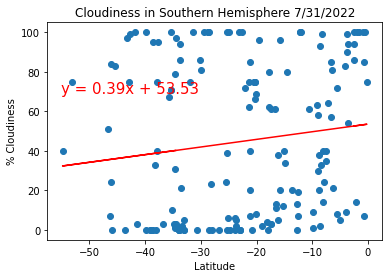

In [25]:
x_values = south_df['Latitude']
y_values = south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,69),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
plt.title("Cloudiness in Southern Hemisphere 7/31/2022")

# Save the figure
plt.savefig("CloudinessSouth.png")

plt.show()

#### Cloudiness Description - Overall the trend is that there are fewer clouds south of the equator, and  
#### more clouds north of the equator. This data logically corresponds well with the humidity data.
#### Once again we see only slight relationships approaching the equator.

## Wind Speed

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

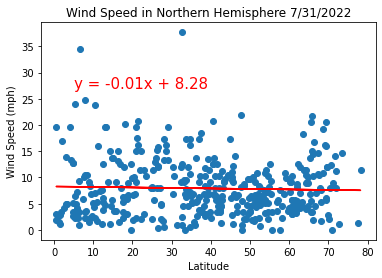

In [26]:
x_values = north_df['Latitude']
y_values = north_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,27),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Wind Speed in Northern Hemisphere 7/31/2022")

# Save the figure
plt.savefig("WindSpeedNorth.png")

plt.show()

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

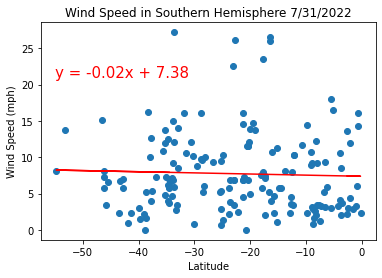

In [27]:
x_values = south_df['Latitude']
y_values = south_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,21),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Wind Speed in Southern Hemisphere 7/31/2022")

# Save the figure
plt.savefig("WindSpeedSouth.png")

plt.show()

#### Wind Speed Description - Overall the trend is that wind speed has very little relation to the equator.   